# <a name="0">Hierarchical Clustering</a>

1. <a href="#1">Read the dataset</a>
2. <a href="#2">Data investigation</a>
3. <a href="#3">Data preprocessing </a>
4. <a href="#4">Features transformation </a>
4. <a href="#5">Training datasets</a>
5. <a href="#6">Improvement ideas</a>



In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

## 1. <a name="1">Read the dataset</a>
(<a href="#0">Go to top</a>)

First dowmload the data set from this link https://www.kaggle.com/fernandol/countries-of-the-world
then import it in python.

In [ ]:
!unzip archive.zip

Archive:  archive.zip
  inflating: countries of the world.csv  


In [5]:
#read the data

data_path = '/content/countries of the world.csv'  #the path where you downloaded the data
df = pd.read_csv(data_path)

print('The shape of the dataset is:', df.shape)

The shape of the dataset is: (227, 20)


## 2. <a name="2">Data investigation</a>
(<a href="#0">Go to top</a>)

in this part you need to check the data quality and assess any issues in the data as:
- null values in each column 
- each column has the proper data type
- outliers
- duplicate rows
- distribution for each column (skewness)
<br>

**comment each issue you find** 

In [ ]:
df.head()

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,"48,0","0,00","23,06","163,07",700.0,"36,0","3,2","12,13","0,22","87,65",1,"46,6","20,34","0,38","0,24","0,38"
1,Albania,EASTERN EUROPE,3581655,28748,"124,6","1,26","-4,93","21,52",4500.0,"86,5","71,2","21,09","4,42","74,49",3,"15,11","5,22","0,232","0,188","0,579"
2,Algeria,NORTHERN AFRICA,32930091,2381740,"13,8","0,04","-0,39",31,6000.0,"70,0","78,1","3,22","0,25","96,53",1,"17,14","4,61","0,101","0,6","0,298"
3,American Samoa,OCEANIA,57794,199,"290,4","58,29","-20,71","9,27",8000.0,"97,0","259,5",10,15,75,2,"22,46","3,27",NaN,NaN,NaN
4,Andorra,WESTERN EUROPE,71201,468,"152,1","0,00","6,6","4,05",19000.0,"100,0","497,2","2,22",0,"97,78",3,"8,71","6,25",NaN,NaN,NaN


In [ ]:
# Let's see the data types and non-null values for each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227 entries, 0 to 226
Data columns (total 20 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Country                             227 non-null    object 
 1   Region                              227 non-null    object 
 2   Population                          227 non-null    int64  
 3   Area (sq. mi.)                      227 non-null    int64  
 4   Pop. Density (per sq. mi.)          227 non-null    object 
 5   Coastline (coast/area ratio)        227 non-null    object 
 6   Net migration                       224 non-null    object 
 7   Infant mortality (per 1000 births)  224 non-null    object 
 8   GDP ($ per capita)                  226 non-null    float64
 9   Literacy (%)                        209 non-null    object 
 10  Phones (per 1000)                   223 non-null    object 
 11  Arable (%)                          225 non-n

In [ ]:
round(df.isnull().sum(axis=0)*100/df.shape[0],2)

Country                               0.00
Region                                0.00
Population                            0.00
Area (sq. mi.)                        0.00
Pop. Density (per sq. mi.)            0.00
Coastline (coast/area ratio)          0.00
Net migration                         1.32
Infant mortality (per 1000 births)    1.32
GDP ($ per capita)                    0.44
Literacy (%)                          7.93
Phones (per 1000)                     1.76
Arable (%)                            0.88
Crops (%)                             0.88
Other (%)                             0.88
Climate                               9.69
Birthrate                             1.32
Deathrate                             1.76
Agriculture                           6.61
Industry                              7.05
Service                               6.61
dtype: float64

In [ ]:
# This will print basic statistics for numerical columns
df.describe()

,Population,Area (sq. mi.),GDP ($ per capita)
count,2.270000e+02,2.270000e+02,226.000000
mean,2.874028e+07,5.982270e+05,9689.823009
std,1.178913e+08,1.790282e+06,10049.138513
min,7.026000e+03,2.000000e+00,500.000000
25%,4.376240e+05,4.647500e+03,1900.000000
50%,4.786994e+06,8.660000e+04,5550.000000
75%,1.749777e+07,4.418110e+05,15700.000000
max,1.313974e+09,1.707520e+07,55100.000000


## 3. <a name="3">Data preprocessing</a>
(<a href="#0">Go to top</a>)


In [ ]:
for i in pd.

### Define below all the issues that you had found in the previous part
1- Missing Values        <br>
2- Improper data types        <br>
3- Data is Skewed on Multible features        <br>

In [ ]:
#make a copy for the original dataset
df_copy=df.copy()

### for each issue adapt this methodology 
- start by defining the solution
- apply this solution onn the data
- test the solution to make sure that you have solved the issue

**First issue**

In [ ]:
df = pd.read_csv(data_path,decimal=",")

In [6]:
#solution 
for i in df.select_dtypes("object"):
  if i not in ['Country','Region']:
    df[i] = df[i].str.replace(',','.')
    df[i] = pd.to_numeric(df[i])

**Second issue**

In [7]:
df = df.fillna(df[['Net migration','Infant mortality (per 1000 births)','GDP ($ per capita)','Literacy (%)','Phones (per 1000)','Arable (%)','Crops (%)','Other (%)','Climate','Birthrate','Deathrate','Agriculture','Industry','Service']].mean())


In [ ]:
#test 
df.isna().sum()

Country                               0
Region                                0
Population                            0
Area (sq. mi.)                        0
Pop. Density (per sq. mi.)            0
Coastline (coast/area ratio)          0
Net migration                         0
Infant mortality (per 1000 births)    0
GDP ($ per capita)                    0
Literacy (%)                          0
Phones (per 1000)                     0
Arable (%)                            0
Crops (%)                             0
Other (%)                             0
Climate                               0
Birthrate                             0
Deathrate                             0
Agriculture                           0
Industry                              0
Service                               0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227 entries, 0 to 226
Data columns (total 20 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Country                             227 non-null    object 
 1   Region                              227 non-null    object 
 2   Population                          227 non-null    int64  
 3   Area (sq. mi.)                      227 non-null    int64  
 4   Pop. Density (per sq. mi.)          227 non-null    float64
 5   Coastline (coast/area ratio)        227 non-null    float64
 6   Net migration                       227 non-null    float64
 7   Infant mortality (per 1000 births)  227 non-null    float64
 8   GDP ($ per capita)                  227 non-null    float64
 9   Literacy (%)                        227 non-null    float64
 10  Phones (per 1000)                   227 non-null    float64
 11  Arable (%)                          227 non-n

In [ ]:
#solution 


In [ ]:
#test 


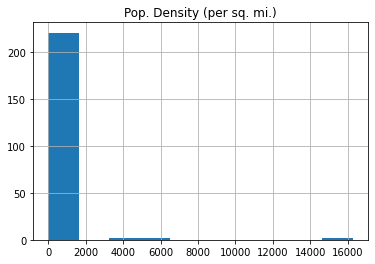

8.284885540855095


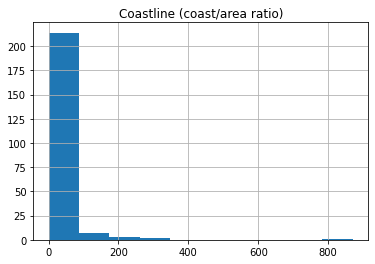

8.221680027174678


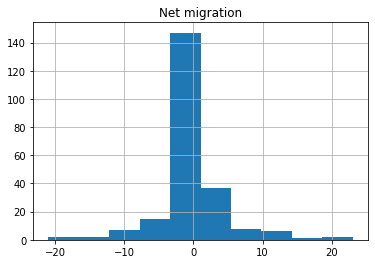

0.12824081799668421


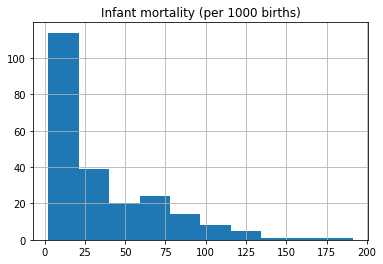

1.4393580098880385


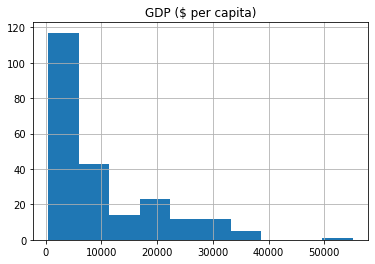

1.3789238936552997


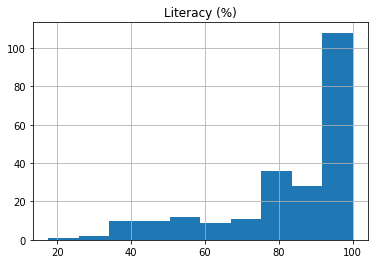

-1.2684389272941412


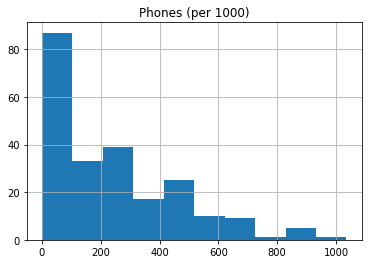

1.0250200303208958


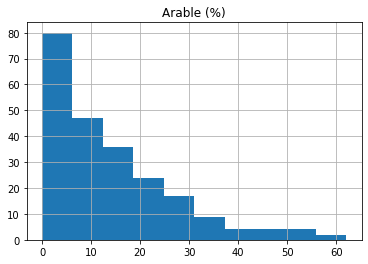

1.3405586081433694


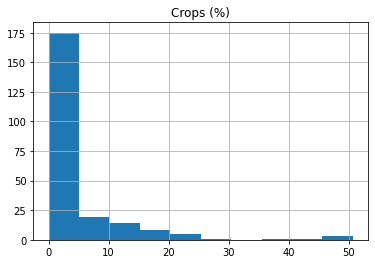

3.2393346190700254


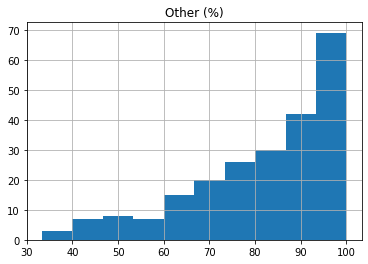

-0.9605254003934527


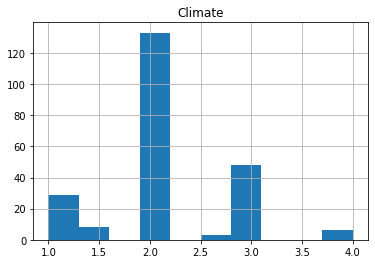

0.36829224924356896


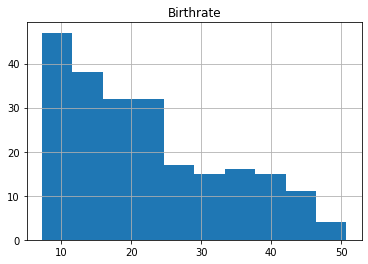

0.7126223047922147


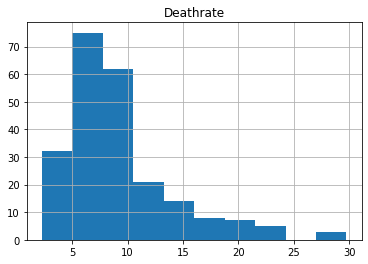

1.66709708576758


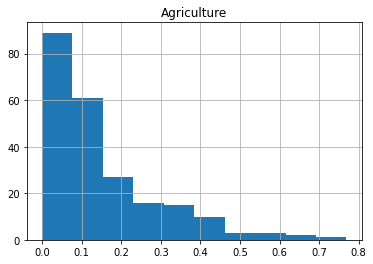

1.467287081521682


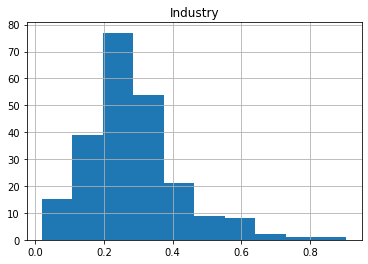

1.1399586345670194


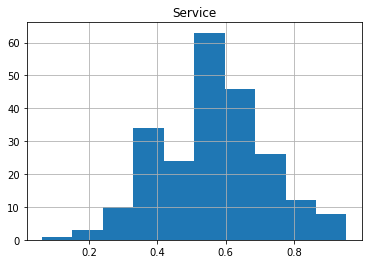

-0.14163379181404492


In [ ]:
for i in df.select_dtypes('float64'):
  plt.title(i)
  df[i].hist()
  plt.show()
  print(str(df[i].skew()))

In [ ]:
#

## 4. <a name="4">Features transformation</a>
(<a href="#0">Go to top</a>)

*What is the feature scaling technique that would use and why?* <br>
*return to this section again and try another technique and see how that will impact your result*<br>
for more details on different methods for scaling check these links
- https://scikit-learn.org/stable/modules/preprocessing.html#preprocessing
- https://scikit-learn.org/stable/modules/classes.html#module-sklearn.preprocessing
- https://www.analyticsvidhya.com/blog/2020/07/types-of-feature-transformation-and-scaling/

In [9]:
from sklearn import preprocessing

In [10]:
scaler = preprocessing.StandardScaler()
df = scaler.fit_transform(df.drop(columns=["Region","Country"]))
#robust scalar can improve score

In [ ]:
# for i in df.select_dtypes('float64'):
#   df[i] = np.log(df[i])



## 5. <a name="5">Training and hyperparamter tuning</a>
(<a href="#0">Go to top</a>)


Before we start the training process we need to specify 3 paramters:<br>
1- Linkage criteria : The linkage criterion determines the distance between two clusters
    - Complete-Linkage Clustering
    - Single-Linkage Clustering
    - Average-Linkage Clustering
    - Centroid Linkage Clustering
2- Distance function:
    - Euclidean Distance 
    - Manhattan Distance 
    - Mahalanobis distance 
3- Number of clusters


### *Number of clusters*
Use Dendograms to specify the optimum number of clusters
- Compare how changing linkage criteria or distance function would affect the optimum number of clusters
- you can use silhouette_score or any other evalution method to help you determine the optimum number of clusters
https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html

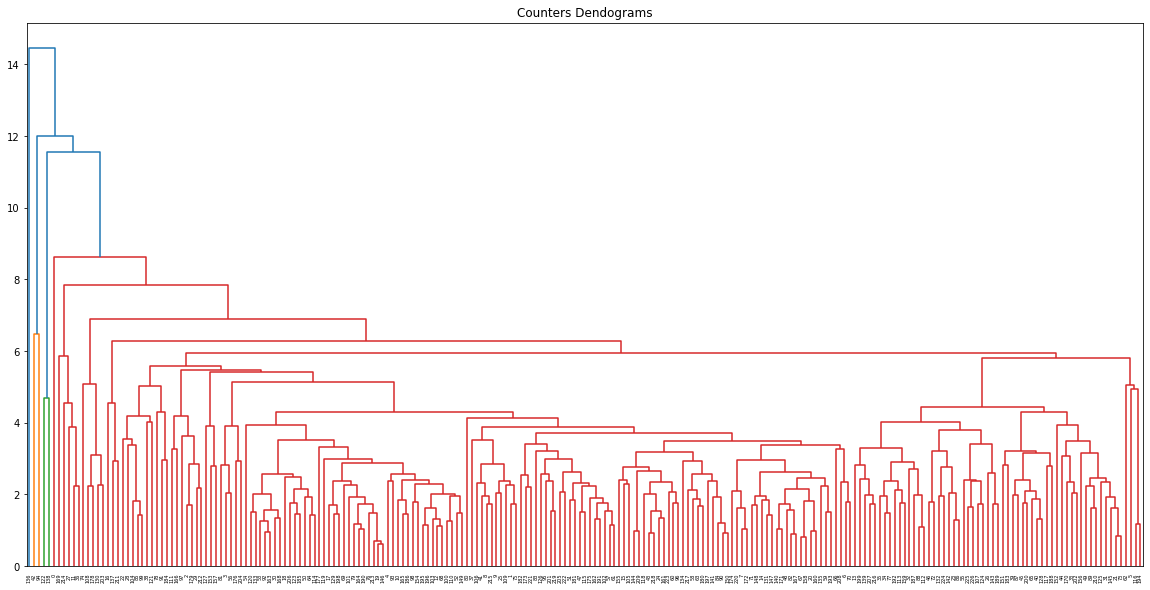

In [ ]:
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(20, 10))
plt.title("Counters Dendograms")
dend = shc.dendrogram(shc.linkage(y= df , method='average',metric='euclidean'),orientation='top') #fill y with your dataframe
                                                                                      #and method with linkage criteria
                                                                                      #and metric with distance function

In [ ]:
#training
from sklearn.cluster import AgglomerativeClustering

model = AgglomerativeClustering()

#model.fit(df)
y=model.fit_predict(df)

In [ ]:
from sklearn.metrics import silhouette_score
silhouette_score(df,y)

0.21397947347045962

## 6. <a name="6">improvement ideas</a>
(<a href="#0">Go to top</a>)

- Try to use PCA to reduce the number of features and compare how this will affect the clustring process
- Try to run your code again but with different tranformation technique
- Implement gap statistics method and use it as evaluation metric and compare the result with what you did before https://www.datanovia.com/en/lessons/determining-the-optimal-number-of-clusters-3-must-know-methods/#gap-statistic-method 

In [11]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.decomposition import PCA

model = AgglomerativeClustering(2)

#model.fit(df)
for i in range(1,19):
  pca = PCA(i)
  componants = pca.fit_transform(df)
  y=model.fit_predict(componants)
  from sklearn.metrics import silhouette_score
  print(i," : ",silhouette_score(componants,y))

1  :  0.5928181420531764
2  :  0.4110887817514775
3  :  0.33551760517643014
4  :  0.2696399513333095
5  :  0.31346061427143207
6  :  0.27708443961190327
7  :  0.23641999502507466
8  :  0.25783549931739624
9  :  0.24302417134126714
10  :  0.24260665043523502
11  :  0.22985952639967328
12  :  0.23909344523675166
13  :  0.2088843587550262
14  :  0.2148436772955862
15  :  0.21223694275001118
16  :  0.21401245472925848
17  :  0.21397947508353798
18  :  0.21397947347045945
